# Load image data and save to one file

In [1]:
from os import listdir
from os.path import isfile, join

datadir = 'images'
imgfiles = [f for f in listdir(datadir) if isfile(join(datadir, f))]

print(imgfiles)

['cam_119_1.jpg', 'cam_33_0.jpg', 'cam_89_0.jpg', 'cam_30_2.jpg', 'cam_33_1.jpg', 'cam_30_1.jpg', 'cam_137_2.jpg', 'cam_76_2.jpg', 'cam_95_0.jpg', 'cam_8_0.jpg', 'cam_91_0.jpg', 'cam_34_1.jpg', 'cam_29_0.jpg', 'cam_99_0.jpg', 'cam_116_2.jpg', 'cam_49_2.jpg', 'cam_141_2.jpg', 'cam_87_0.jpg', 'cam_94_0.jpg', 'cam_61_1.jpg', 'cam_75_2.jpg', 'cam_90_0.jpg', 'cam_1_0.jpg', 'cam_62_1.jpg', 'cam_111_2.jpg', 'cam_82_2.jpg', 'cam_64_1.jpg', 'cam_35_2.jpg', 'cam_40_0.jpg', 'cam_31_0.jpg', 'cam_113_2.jpg', 'cam_32_1.jpg', 'cam_53_2.jpg', 'cam_34_0.jpg', 'cam_63_1.jpg', 'cam_136_2.jpg', 'cam_66_0.jpg', 'cam_2_0.jpg', 'cam_135_2.jpg', 'cam_26_2.jpg', 'cam_31_1.jpg', 'cam_11_0.jpg', 'cam_105_2.jpg', 'cam_127_2.jpg', 'cam_23_0.jpg', 'cam_46_0.jpg', 'cam_77_2.jpg', 'cam_138_2.jpg', 'cam_42_0.jpg', 'cam_140_2.jpg', 'cam_5_0.jpg', 'cam_36_0.jpg', 'cam_24_0.jpg', 'cam_139_2.jpg', 'cam_38_2.jpg', 'cam_107_2.jpg', 'cam_93_0.jpg', 'cam_71_2.jpg', 'cam_121_1.jpg', 'cam_118_1.jpg', 'cam_25_0.jpg', 'cam_32_0.j

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

train_samples, validation_samples = train_test_split(imgfiles, test_size=0.3)

print(len(train_samples))
print(train_samples)
print(len(validation_samples))
print(validation_samples)

115
['cam_43_2.jpg', 'cam_128_2.jpg', 'cam_25_2.jpg', 'cam_7_0.jpg', 'cam_56_2.jpg', 'cam_26_2.jpg', 'cam_55_2.jpg', 'cam_102_0.jpg', 'cam_121_1.jpg', 'cam_114_2.jpg', 'cam_130_2.jpg', 'cam_88_0.jpg', 'cam_40_2.jpg', 'cam_52_2.jpg', 'cam_79_2.jpg', 'cam_29_2.jpg', 'cam_10_0.jpg', 'cam_106_2.jpg', 'cam_35_0.jpg', 'cam_53_2.jpg', 'cam_35_2.jpg', 'cam_124_2.jpg', 'cam_42_2.jpg', 'cam_67_2.jpg', 'cam_39_0.jpg', 'cam_101_0.jpg', 'cam_47_0.jpg', 'cam_138_2.jpg', 'cam_12_0.jpg', 'cam_40_0.jpg', 'cam_31_0.jpg', 'cam_127_2.jpg', 'cam_94_0.jpg', 'cam_116_2.jpg', 'cam_113_2.jpg', 'cam_46_0.jpg', 'cam_23_0.jpg', 'cam_21_0.jpg', 'cam_78_2.jpg', 'cam_139_2.jpg', 'cam_99_0.jpg', 'cam_15_0.jpg', 'cam_68_2.jpg', 'cam_22_0.jpg', 'cam_54_2.jpg', 'cam_27_2.jpg', 'cam_24_0.jpg', 'cam_126_2.jpg', 'cam_32_1.jpg', 'cam_117_1.jpg', 'cam_16_0.jpg', 'cam_26_0.jpg', 'cam_28_0.jpg', 'cam_4_0.jpg', 'cam_2_0.jpg', 'cam_36_2.jpg', 'cam_66_0.jpg', 'cam_27_0.jpg', 'cam_111_2.jpg', 'cam_1_0.jpg', 'cam_76_2.jpg', 'cam_96

In [3]:
import os
from shutil import copyfile

p1 = 'data_tl'
if not os.path.exists(p1):
    os.makedirs(p1)

p2 = p1 + '/' + 'training'
p3 = p1 + '/' + 'validation'

if not os.path.exists(p2):
    os.makedirs(p2)

if not os.path.exists(p3):
    os.makedirs(p3)

for item in train_samples:
    src = join(datadir, item)
    dst = join(p2, item)
    copyfile(src, dst)

for item in validation_samples:
    src = join(datadir, item)
    dst = join(p3, item)
    copyfile(src, dst)    

(600, 800, 3)


True

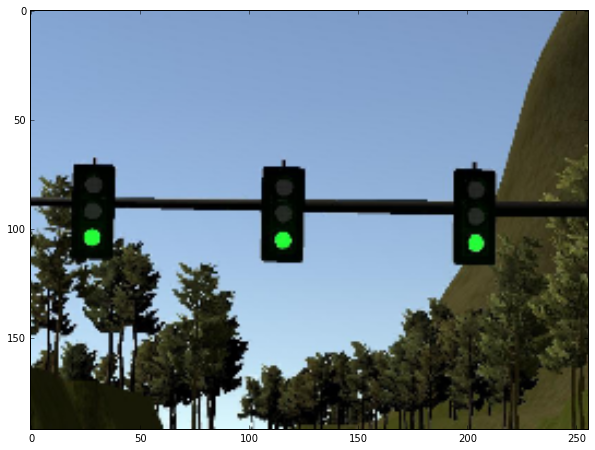

In [4]:
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image
import re
import numpy as np

# Visualizations will be shown in the notebook.
%matplotlib inline

width = 256
height = int(width*0.75)

a =cv2.imread(datadir + '/'+train_samples[0])
Height, Width, Channels = a.shape
print(a.shape)

a = cv2.resize(a,(width,height))

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(a.astype(np.uint8), cv2.COLOR_BGR2RGB))

cv2.imwrite('tmp.jpg',a)



In [5]:
# load data from folders
im_size = [Width, Height]

def saveAugData(samples, savePath):
    idx = 0    
    for sample in samples:
        noise = np.random.randint(0, 3, size=(im_size[1], im_size[0], 3))
        a =cv2.imread(datadir + '/'+sample)
        a = a + noise
        a[a<0]=0
        a[a>255] = 255

        #r = ndimage.rotate(a, np.random.randint(0,10)-5)
        r = Image.fromarray(a.astype(np.uint8), 'RGB')
        rot = r.rotate(np.random.randint(0,10)-5)
        im_flip = cv2.flip(a, 1)
        im_flip2 = cv2.flip(a, 0)
        
        s = re.search(r'_\d\.jpg', sample)
        t = s.group()
        y = int(t[1:2])
        
        dst = join(savePath, 'aug'+str(idx)+sample)
        cv2.imwrite(dst, a)
        idx += 1
        dst = join(savePath, 'aug'+str(idx)+sample)
        cv2.imwrite(dst, np.asarray(rot))
        idx += 1
        dst = join(savePath, 'aug'+str(idx)+sample)
        cv2.imwrite(dst, im_flip)
        idx += 1
        dst = join(savePath, 'aug'+str(idx)+sample)
        cv2.imwrite(dst, im_flip2)
        

In [6]:
saveAugData(train_samples, p2)
saveAugData(validation_samples, p3)

In [32]:
# load data from folders
def loadData(samples):
    X_train = []
    Y_train = []

    im_size = [width, height]
    #im_size = [64, 48]
    for sample in samples:
        noise = np.random.randint(0, 3, size=(im_size[1], im_size[0], 3))
        a =cv2.imread(datadir + '/'+sample)
        a = cv2.resize(a, (im_size[0],im_size[1])) + noise
        a[a<0]=0
        a[a>255] = 255

        #r = ndimage.rotate(a, np.random.randint(0,10)-5)
        r = Image.fromarray(a.astype(np.uint8), 'RGB')
        rot = r.rotate(np.random.randint(0,10)-5)
        im_flip = cv2.flip(a, 1)
        im_flip2 = cv2.flip(a, 0)

        X_train.extend([a, np.asarray(rot), im_flip, im_flip2])
        s = re.search(r'_\d\.jpg', sample)
        t = s.group()
        y = int(t[1:2])
        Y_train.extend([y,y,y,y])
        #print(sample+"\t" + str(y))
    return np.array(X_train), np.array(Y_train)


In [33]:
X_train,Y_train = loadData(train_samples)
X_valid, Y_valid = loadData(validation_samples)

print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)

(460, 192, 256, 3)
(460,)
(200, 192, 256, 3)
(200,)


In [34]:
import pickle

img_data = {"X_train":X_train,
       "Y_train":Y_train,
       "X_valid":X_valid,
       "Y_valid":Y_valid}

pickle.dump( img_data, open( "img_data_tl_"+str(width)+".p", "wb" ) , protocol=2)

## Visualize rotation and noise

True

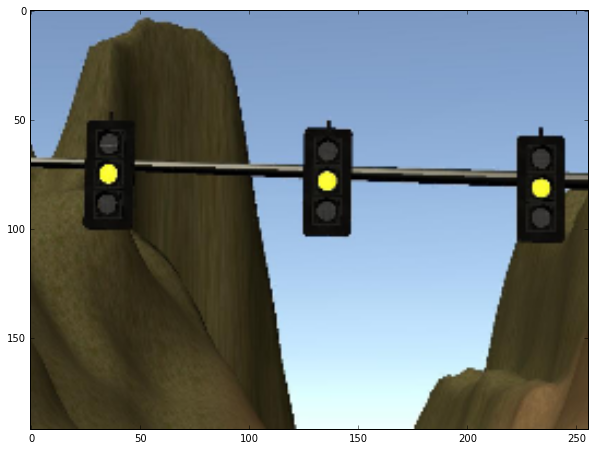

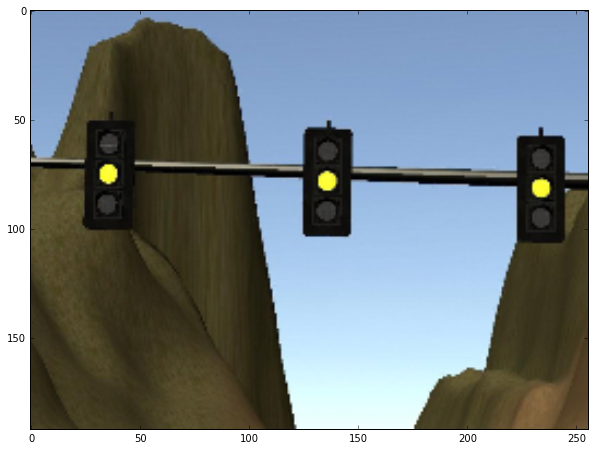

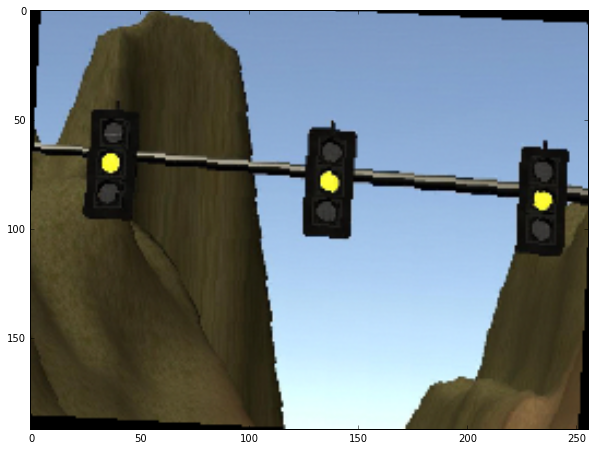

In [35]:

a =cv2.imread(datadir + '/'+train_samples[0])
a = cv2.resize(a,(width,height))

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(a.astype(np.uint8), cv2.COLOR_BGR2RGB))

noise = np.random.randint(0, 3, size=(height, width, 3))
a = a + noise
a[a>255] = 255

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(a.astype(np.uint8), cv2.COLOR_BGR2RGB))

r = Image.fromarray(a.astype(np.uint8), 'RGB')
rot = np.asarray(r.rotate(np.random.randint(0,10)-5))

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(rot.astype(np.uint8), cv2.COLOR_BGR2RGB))

cv2.imwrite('tmp.jpg',a)

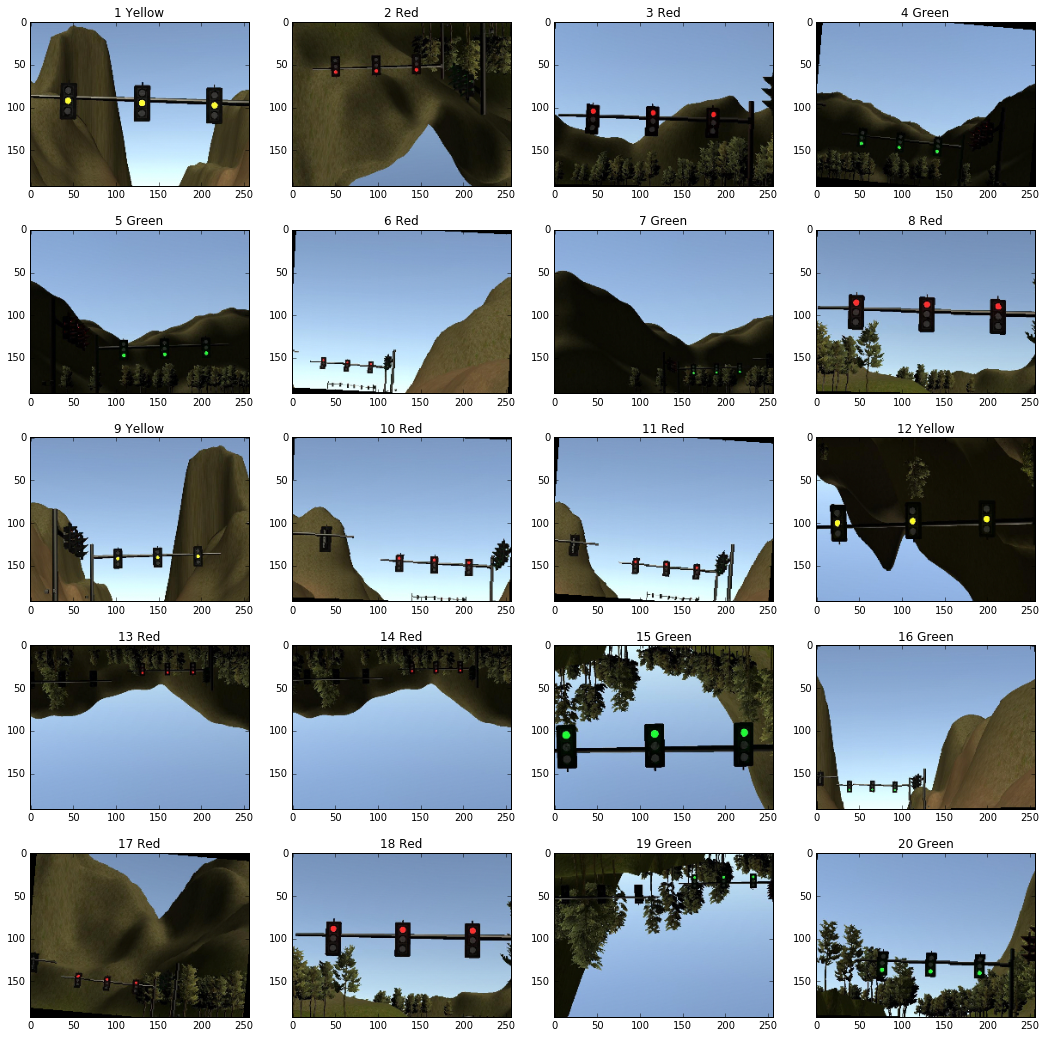

In [36]:

plt.figure(1, figsize=(18,18))

lightC = ["Red","Yellow","Green"]
for test in range(20):
    idx = np.random.randint(0,X_train.shape[0])
    im = np.squeeze(X_train[idx,:,:,:])
    
    plt.subplot(5,4, test+1)
    plt.title(str(test+1)+' '+lightC[Y_train[idx]])
    plt.imshow(cv2.cvtColor(im.astype(np.uint8), cv2.COLOR_BGR2RGB))
    
    #print(str(test)+'  '+str(idx) + '\t' + str(idx/4)+'\t'+ str(Y_train[idx])+' '+lightC[Y_train[idx]])

plt.savefig('fig5x4.png')